Importing the Libraries

In [2]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
import sys

In [3]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to C:\nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-date!
[nltk_data]    

True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
from textblob import TextBlob

In [7]:
from pattern.en import sentiment

Create a request and get the data from the website

In [8]:
#we are using request package to make a GET request for the website, which means we're getting data from it.
r=requests.get('https://www.newsy.com/stories/commercial-companies-advance-space-exploration/')

Set the correct text encoding

In [9]:
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

Get the HTML from the request object.

In [10]:
#Extracting the HTML from the request object
html = r.text

In [11]:
# Printing the first 500 characters in html
print(html[:500])

<!DOCTYPE html><html lang="en"><head><!-- Google Analytics --><script>
            (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
            (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
            m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
            })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

            ga('create', 'UA-5101570-1', 'auto');
           


Create a beautiful soup object from the HTML.

In [12]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)
# Getting the text out of the soup
text = soup.get_text()

In [13]:
#total length
len(text)

4755

In [49]:
#having a look at the text
print(text[100:1100])

sScience/HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us






Science and HealthHow Commercial Companies Are Advancing Space ExplorationThere's competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAArticle by Clayton SandellFacebook ShareTweetEmailSMSOctober 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the 'Starship' lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musk's mission-to-Mars dreams a reality."He says, 'I want to die on Mars, just not on impact,'" editor for Spaceref.com Keith Cowing said. "I've known Elon forever, for like 20 years. I met him when he w

Text cleaning

In [55]:
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "'"])

In [56]:
clean_text

'Commercial Companies Advance Space Exploration (VIDEO)     Scripps NewsnewsU.S. NewsWorldLifePoliticsScience HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us       Science and HealthHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stations.How Commercial Companies Are Advancing Space ExplorationNASAArticle by\xa0Clayton SandellFacebook ShareTweetEmailSMSOctober 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the Starship lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musks mission-to-Mars dreams a reality."He says, I want to die on Mars, just not on impact," editor fo

Split the text into individual sentences.

In [57]:
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))


In [58]:
sentence

['Commercial Companies Advance Space Exploration (VIDEO)',
 'Scripps NewsnewsU.S. NewsWorldLifePoliticsScience HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us       Science and HealthHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stations.',
 'How Commercial Companies Are Advancing Space ExplorationNASAArticle by\xa0Clayton SandellFacebook ShareTweetEmailSMSOctober 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.',
 'Newly released video shows the Starship lifting into an aerial ballet of flips and turns before landing again.',
 'SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musks mission-to-Mars dreams a reality.',
 '"He says, I want to die on Mars, just not o

In [59]:
print(len(sentence))


38


In [60]:
print(sentence[2])


How Commercial Companies Are Advancing Space ExplorationNASAArticle by Clayton SandellFacebook ShareTweetEmailSMSOctober 29, 2021As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.


Sentiment Analysis with Textblob

In [61]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [62]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])


In [63]:
df_textblob.head()


,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.000000,0.000000
1,Scripps NewsnewsU.S. NewsWorldLifePoliticsScie...,0.009091,0.307386
2,How Commercial Companies Are Advancing Space E...,0.040000,0.600000
3,Newly released video shows the Starship liftin...,0.136364,0.454545
4,SpaceX hopes the ship will reach orbit for the...,0.125000,0.166667


In [64]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      38 non-null     object 
 1   Polarity      38 non-null     float64
 2   Subjectivity  38 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.0+ KB


The data frame contains the 38 sentences and their Polarity and Subjectivity scores.

Analyse the sentence polarity

Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

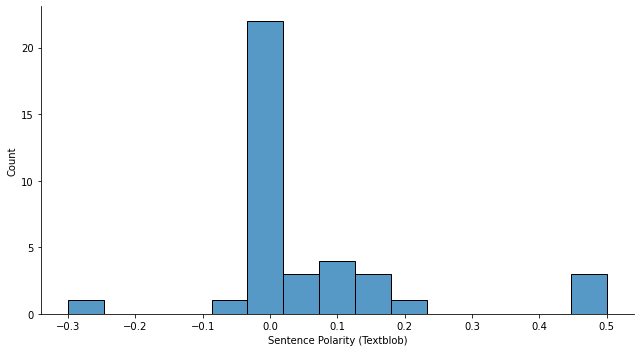

In [65]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Due to some reason around half the sentences have zero polarity. Maybe, it’s because of the fact that they are neutral. A few sentences are highly positive and a few are negative.

In [ ]:
Analyse the subjectivity

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

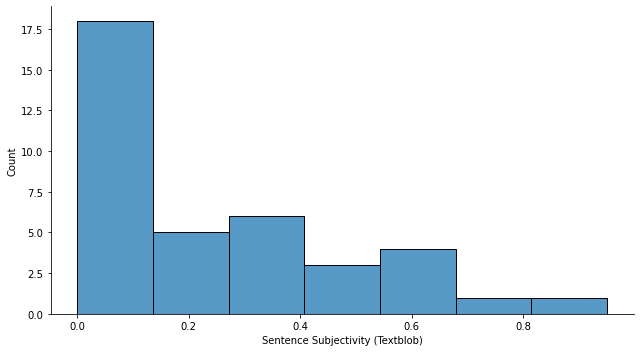

In [66]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

The values of subjectivity also vary, with few sentences being highly subjective and a majority of sentences being less subjective.

Sentiment Analysis with Pattern

We take the sentences and get the sentiment scores

In [67]:
pattern_sentiment=[]
for s in sentence:
    res= sentiment(s)
    c= res[0]
    d= res[1]
    pattern_sentiment.append([s,c,d])

In [69]:
pattern_sentiment[1]

['Scripps NewsnewsU.S. NewsWorldLifePoliticsScience HealthTechBusinessEntertainmentSportsMental Healthshowswatch livesearchFollow Us       Science and HealthHow Commercial Companies Are Advancing Space ExplorationTheres competition among roughly a dozen private companies to launch new space stations.',
 0.009090909090909087,
 0.3073863636363636]

we convert the data into a data frame

In [70]:
df_pattern = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [71]:
df_pattern.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.000000,0.000000
1,Scripps NewsnewsU.S. NewsWorldLifePoliticsScie...,0.009091,0.307386
2,How Commercial Companies Are Advancing Space E...,0.040000,0.600000
3,Newly released video shows the Starship liftin...,0.136364,0.454545
4,SpaceX hopes the ship will reach orbit for the...,0.125000,0.166667


In [73]:
df_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      38 non-null     object 
 1   Polarity      38 non-null     float64
 2   Subjectivity  38 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.0+ KB


There are 38 sentences and their sentence scores.

Plot the scores

Text(0.5, 6.79999999999999, 'Sentence Polarity (Pattern)')

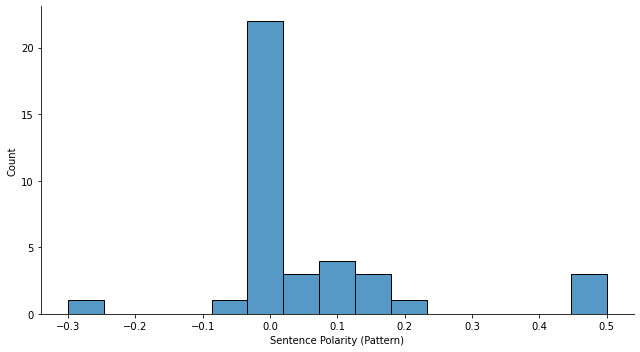

In [74]:
sns.displot(df_pattern["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Pattern)')

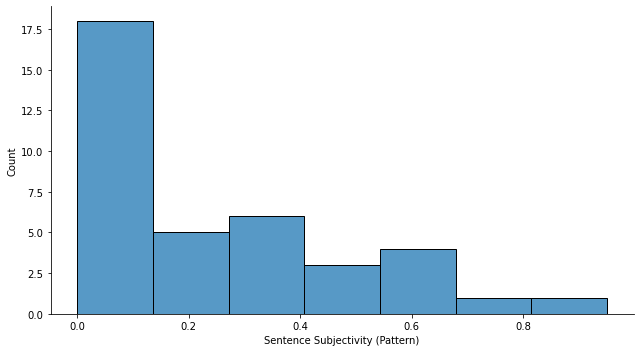

In [75]:
sns.displot(df_pattern["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")

Word Frequency and Word Cloud

Creating the NLTK tokenizer, the tokenizer will convert the text into individual tokens.

In [111]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [112]:
#Tokenizing the text
tokens = tokenizer.tokenize(clean_text)

In [113]:
len(tokens)

768

In [114]:
print(tokens[0:10])

['Commercial', 'Companies', 'Advance', 'Space', 'Exploration', 'VIDEO', 'Scripps', 'NewsnewsU', 'S', 'NewsWorldLifePoliticsScience']


Convert them to lower case for uniformity

In [115]:
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [116]:
#Now we have to remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [117]:
#Appending to words_new all words that are in words but not in sw
words_new=[]
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [118]:
len(words_new)

473

In [121]:
print(words_new[0:10])

['commercial', 'companies', 'advance', 'space', 'exploration', 'video', 'scripps', 'newsnewsu', 'newsworldlifepoliticsscience', 'healthtechbusinessentertainmentsportsmental']


In [122]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)

Plot the data.

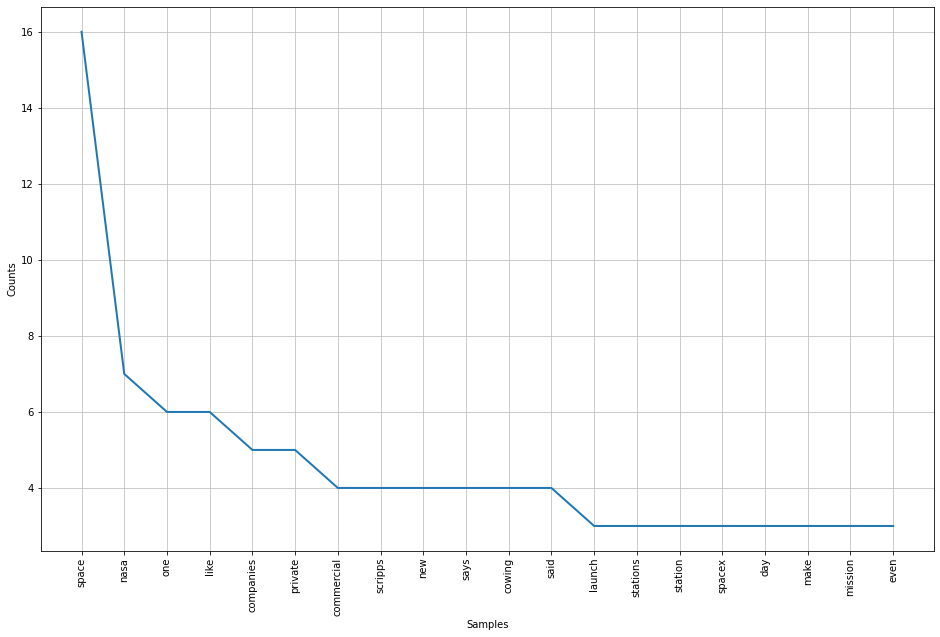

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [123]:
#Frequency Distribution Plot
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

We see that space, NASA, SpaceX, etc can be seen. All these are related to space exploration and space travel

In [124]:
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])

In [ ]:
We plot a word cloud with these text words.

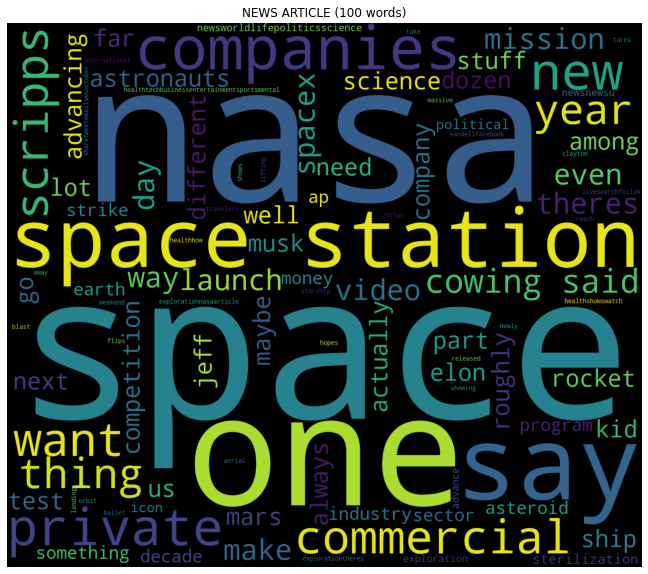

In [125]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()